<a href="https://colab.research.google.com/github/73hr4774/CNN/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
#device configuration
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [ ]:
transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])

#CIFAR-10 dataset
train_dataset=torchvision.datasets.CIFAR10(root='./data',train=True,download=True,transform=transform)
test_dataset=torchvision.datasets.CIFAR10(root='./data',train=False,download=True,transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
len(train_dataset),len(test_dataset)

(50000, 10000)

In [ ]:
batch_size=100

#data loaders
train_loader=DataLoader(dataset=train_dataset,batch_size=batch_size,shuffle=True)
test_loader=DataLoader(dataset=test_dataset,batch_size=batch_size,shuffle=False)

In [ ]:
for i,(images,labels) in enumerate(train_loader):
  print(images.shape)
  print(labels.shape)
  break

torch.Size([100, 3, 32, 32])
torch.Size([100])


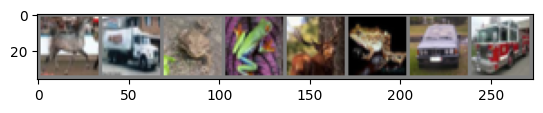

In [ ]:
def imshow(img):
  img=img/2+0.5  #unnormalize
  npimg=img.numpy()
  plt.imshow(np.transpose(npimg,(1,2,0)))
  plt.show()

#show images
imshow(torchvision.utils.make_grid(images[:8]))

In [ ]:
labels[:8]

tensor([7, 9, 6, 6, 4, 6, 1, 9])

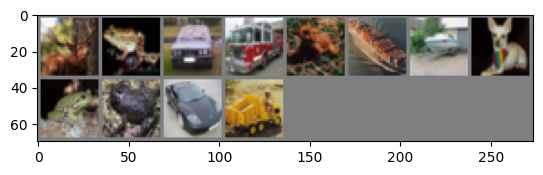

In [ ]:
def imshow(img):
  img=img/2+0.5  #unnormalize
  npimg=img.numpy()
  plt.imshow(np.transpose(npimg,(1,2,0)))
  plt.show()

#show images
imshow(torchvision.utils.make_grid(images[4:16]))

In [ ]:
labels[4:16]

tensor([4, 6, 1, 9, 6, 8, 8, 5, 6, 6, 1, 9])

In [ ]:
classes=('plane','car','bird','cat',
         'deer','dog','frog','horse','ship','truck')

In [ ]:
[classes[i] for i in labels[4:16]]

['deer',
 'frog',
 'car',
 'truck',
 'frog',
 'ship',
 'ship',
 'dog',
 'frog',
 'frog',
 'car',
 'truck']

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=(3,3), padding='same'),
            nn.ReLU(), #This is my activation layer
            nn.MaxPool2d(kernel_size=(2,2), stride=(2,2)), #We have to do max pooling        # Output: (32, 16, 16)

            nn.Conv2d(32, 64, kernel_size=(3,3)),             # Output: (64, 14, 14)
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2,2), stride=(2,2))         # Output: (64, 7, 7)
        )
        self.fc_layers = nn.Sequential(
            nn.Flatten(),                                # Flatten to (64 * 7 * 7 = 3136)
            nn.Linear(64 * 7 * 7, 600),                  # Corrected input size
            nn.ReLU(),
            nn.Linear(600, 120),
            nn.ReLU(),
            nn.Linear(120, 10)
        )

    def forward(self, x):
        x = self.network(x)
        x = self.fc_layers(x)
        return x

In [ ]:
model=CNN()
dummy_input=torch.randn(1,3,32,32)  #single example with CIFAR-10 dimensions
output=model(dummy_input)
print('Output shape:',output.shape)  #Should[1,10]

Output shape: torch.Size([1, 10])


In [ ]:
# Hyperparameters
num_epochs = 10
learning_rate = 0.001

model = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{total_step}], Loss: {loss.item():.4f}")

# Testing the model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f"Accuracy of the model on the 10000 test images: {100 * correct / total:.2f}%")

Epoch [1/10], Step [100/500], Loss: 1.4467
Epoch [1/10], Step [200/500], Loss: 1.3438
Epoch [1/10], Step [300/500], Loss: 1.2789
Epoch [1/10], Step [400/500], Loss: 1.2427
Epoch [1/10], Step [500/500], Loss: 1.0306
Epoch [2/10], Step [100/500], Loss: 1.1154
Epoch [2/10], Step [200/500], Loss: 0.9537
Epoch [2/10], Step [300/500], Loss: 1.2430
Epoch [2/10], Step [400/500], Loss: 0.7574
Epoch [2/10], Step [500/500], Loss: 1.2512
Epoch [3/10], Step [100/500], Loss: 0.6827
Epoch [3/10], Step [200/500], Loss: 0.8696
Epoch [3/10], Step [300/500], Loss: 0.7420
Epoch [3/10], Step [400/500], Loss: 0.7644
Epoch [3/10], Step [500/500], Loss: 0.8693
Epoch [4/10], Step [100/500], Loss: 0.7700
Epoch [4/10], Step [200/500], Loss: 0.5093
Epoch [4/10], Step [300/500], Loss: 0.6223
Epoch [4/10], Step [400/500], Loss: 0.6268
Epoch [4/10], Step [500/500], Loss: 0.7807
Epoch [5/10], Step [100/500], Loss: 0.4458
Epoch [5/10], Step [200/500], Loss: 0.5148
Epoch [5/10], Step [300/500], Loss: 0.5828
Epoch [5/10

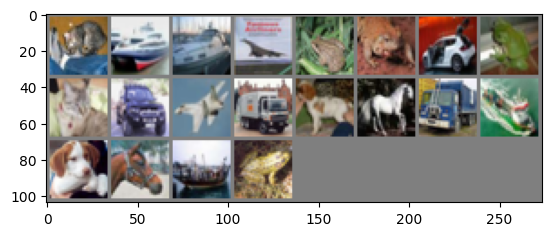

True Labels:      ['cat', 'ship', 'ship', 'plane', 'frog', 'frog', 'car', 'frog', 'cat', 'car', 'plane', 'truck', 'dog', 'horse', 'truck', 'ship', 'dog', 'horse', 'ship', 'frog']
Predicted Labels: ['cat', 'ship', 'ship', 'ship', 'cat', 'frog', 'dog', 'bird', 'cat', 'car', 'plane', 'truck', 'dog', 'horse', 'truck', 'frog', 'dog', 'dog', 'ship', 'frog']


In [ ]:
# Get a batch of test images and labels
data_iter = iter(test_loader)
images, labels = next(data_iter)

# Move images and labels to the device
images = images.to(device)
labels = labels.to(device)

# Predict the labels
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    outputs = model(images)  # Forward pass
    _, predicted = torch.max(outputs, 1)  # Get the predicted class indices

# Display the images along with their true and predicted labels
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.cpu().numpy()  # Convert to numpy
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Show a batch of images
imshow(torchvision.utils.make_grid(images.cpu()[:20]))  # Display first 8 images

# Print true and predicted labels for the first 8 images
print("True Labels:     ", [classes[label.item()] for label in labels[:20]])
print("Predicted Labels:", [classes[label.item()] for label in predicted[:20]])